In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor

import matplotlib.pyplot as plt   

In [4]:
data=pd.read_csv('Dataset.csv')
data.drop('Index',
  axis='columns',
          inplace=True)
data = pd.DataFrame(data)
X=data.iloc[:,0:6].values
Y=data.iloc[:,6:18].values
print("X:",X.shape)
print("Y:",Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

X: (500, 6)
Y: (500, 12)


In [5]:
scaler = StandardScaler()
X_train_sacled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
Y_scaled_train=scaler.fit_transform(y_train)
Y_scaled_test=scaler.fit_transform(y_test)

In [6]:
def show_(X_test_scaled,y_test_predict,y_mse,y_r2_):
    plt.figure(figsize=(8,6))
    plt.scatter(y_test_predict[name],Y_scaled_test)
    plt.title(name)
    plt.xlabel("PREDICTION")
    plt.ylabel("ACTUAL")
    plt.show()
    print('RMSE for ',name,' is ',y_mse[name])
    print('r2_score for ',name,' is ',y_r2_[name])

In [7]:

ESTIMATORS = {
    "K-nn": KNeighborsRegressor(n_neighbors=5), 
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(max_depth=22, random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=22),
    "MultiO/P GBR" :MultiOutputRegressor(GradientBoostingRegressor(n_estimators=6000)),
    "MultiO/P AdaB" :MultiOutputRegressor(AdaBoostRegressor(n_estimators=6000)), 
}

In [8]:
y_test_predict = dict()
y_mse = dict()
y_r2_=dict()

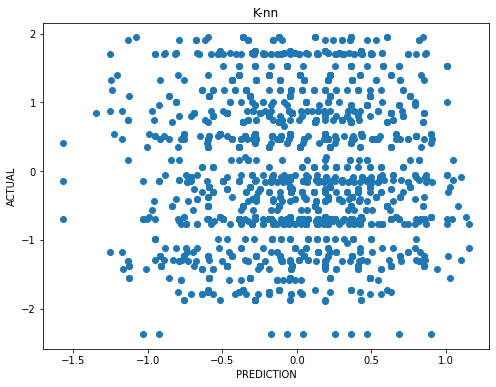

RMSE for  K-nn  is  1.1847632855509869
r2_score for  K-nn  is  -0.18476328555098717


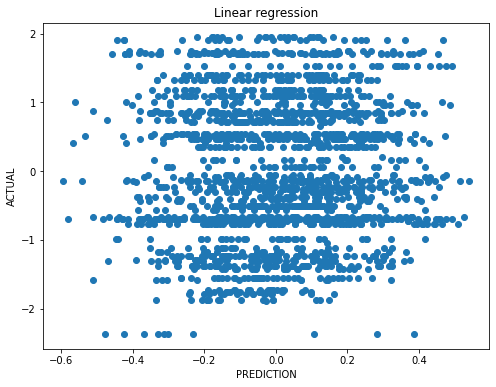

RMSE for  Linear regression  is  1.0211672463488612
r2_score for  Linear regression  is  -0.02116724634886143


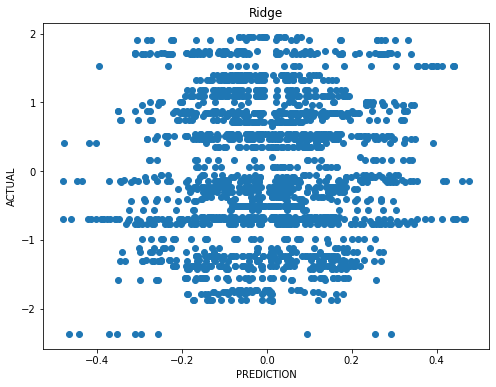

RMSE for  Ridge  is  1.0038931312580377
r2_score for  Ridge  is  -0.0038931312580376596


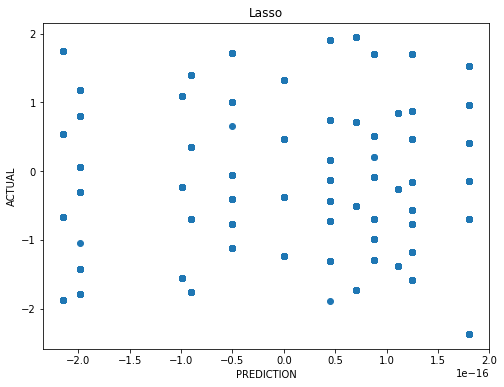

RMSE for  Lasso  is  1.0
r2_score for  Lasso  is  -2.7755575615628914e-17


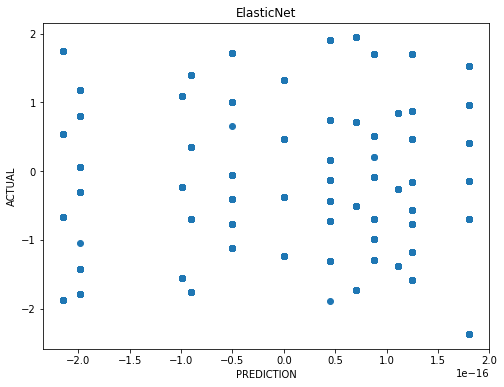

RMSE for  ElasticNet  is  1.0
r2_score for  ElasticNet  is  -2.7755575615628914e-17


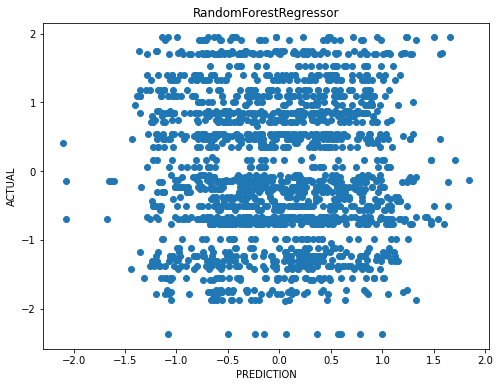

RMSE for  RandomForestRegressor  is  1.440484193897051
r2_score for  RandomForestRegressor  is  -0.4404841938970508


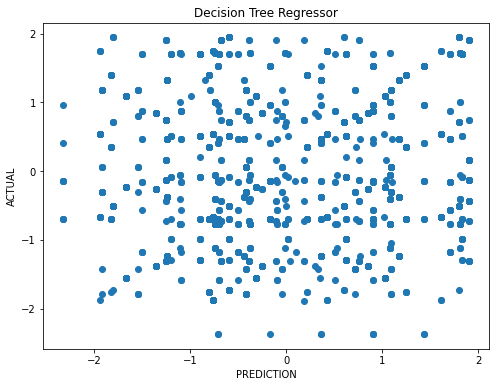

RMSE for  Decision Tree Regressor  is  2.01102141969926
r2_score for  Decision Tree Regressor  is  -1.0110214196992602


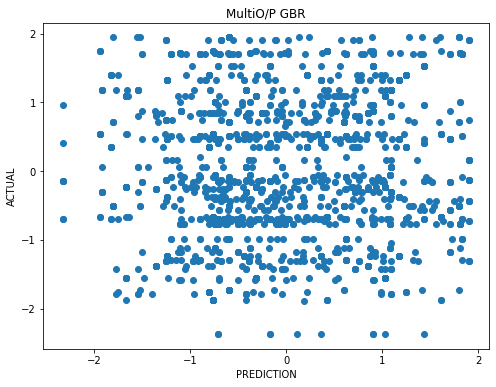

RMSE for  MultiO/P GBR  is  1.9051355368915568
r2_score for  MultiO/P GBR  is  -0.9051355368915569


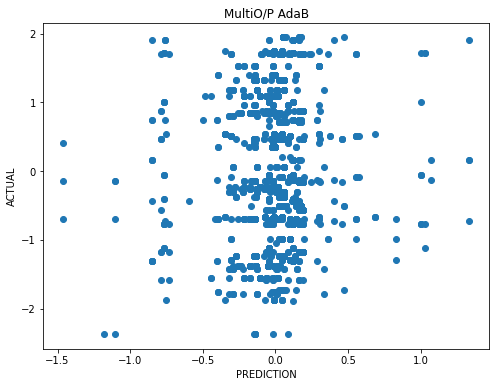

RMSE for  MultiO/P AdaB  is  1.0396712311711382
r2_score for  MultiO/P AdaB  is  -0.03967123117113816


In [9]:
for name,estimator in ESTIMATORS.items():
    estimator.fit(X_train_sacled,Y_scaled_train)
    y_test_predict[name]= estimator.predict(X_test_scaled)    
    y_mse[name]=mean_squared_error(Y_scaled_test,estimator.predict(X_test_scaled))
    y_r2_[name]=r2_score(Y_scaled_test,estimator.predict(X_test_scaled))
    show_(X_test_scaled,y_test_predict,y_mse,y_r2_)

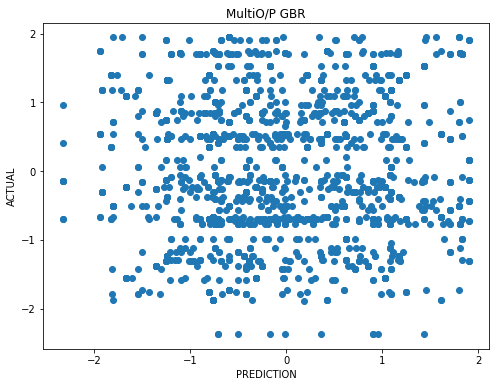

RMSE for  MultiO/P GBR  is  1.907446522224032
r2_score for  MultiO/P GBR  is  -0.9074465222240319


In [10]:
name = "MultiO/P GBR" 
estimator = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=10000))
estimator.fit(X_train_sacled,Y_scaled_train)
y_test_predict[name]= estimator.predict(X_test_scaled)    
y_mse[name]=mean_squared_error(Y_scaled_test,estimator.predict(X_test_scaled))
y_r2_[name]=r2_score(Y_scaled_test,estimator.predict(X_test_scaled))
show_(X_test_scaled,y_test_predict,y_mse,y_r2_)